In [193]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

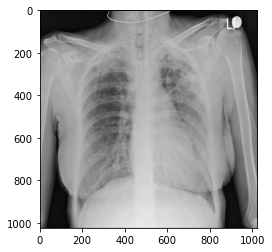

In [194]:
xray = Image.open('xray_one.png')
image = np.asarray(xray)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

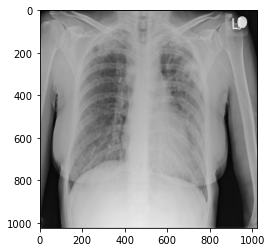

In [225]:
xray2 = Image.open('xray_two.png')
image2 = np.asarray(xray2)
plt.imshow(image2, cmap='gray', vmin=0, vmax=255)

In [195]:
def bilinear_interpolate(im, x, y, height, width):
    x = np.asarray(x)
    y = np.asarray(y)

    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, im.shape[1]-1);
    x1 = np.clip(x1, 0, im.shape[1]-1);
    y0 = np.clip(y0, 0, im.shape[0]-1);
    y1 = np.clip(y1, 0, im.shape[0]-1);

    Ia = im[ y0, x0 ]
    Ib = im[ y1, x0 ]
    Ic = im[ y0, x1 ]
    Id = im[ y1, x1 ]

    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)

    image_array = wa*Ia + wb*Ib + wc*Ic + wd*Id
    
    return image_array.reshape((height,width))
    

In [216]:
def geometric_transform(image, type ='translation', tx=0, ty=0, angle=np.radians(45), scale=1):
    scale = 1/scale
    tx = -tx
    ty = -ty
    
    R = np.array([
        [np.cos(angle), np.sin(angle), 0],
        [-np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])
    T = np.array([
        [1, 0, ty],
        [0, 1, tx],
        [0, 0, 1]
    ])
    S = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]
    ])
    
    R_center = np.array([[1, 0, 512],[0, 1, 512],[0, 0, 1]])@R@np.array([[1, 0, -512],[0, 1, -512],[0, 0, 1] ])
    S_center = np.array([[1, 0, 512],[0, 1, 512],[0, 0, 1]])@S@np.array([[1, 0, -512],[0, 1, -512],[0, 0, 1] ])
    
    height, width = image.shape[:2]
    coords = np.indices((height, width)).reshape(2, -1)
    coords = np.vstack((coords, np.ones(coords.shape[1]))) 
    
    
    if type == 'translation':
        transformed_coords = (T@coords)
    elif type == 'rotation':
        transformed_coords = R_center@coords
    elif type == 'scaling':
        transformed_coords = S_center@coords
    

    xcoord_transformed, ycoord_transformed = transformed_coords[1, :], transformed_coords[0, :]

    transformed_img = bilinear_interpolate(image, xcoord_transformed, ycoord_transformed, height, width)
    
    return transformed_img

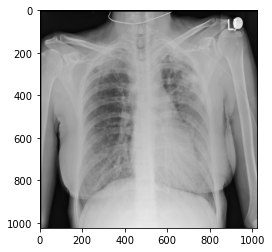

In [246]:
img = geometric_transform(image, type ='translation', tx=5.5, ty=4.4, angle=np.radians(35), scale=0.4)
plt.imshow(img, cmap ='gray', vmin=0, vmax=255)

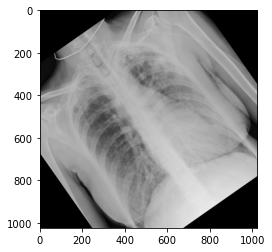

In [221]:
img2 = geometric_transform(image, type ='rotation', tx=5.5, ty=4.4, angle=np.radians(35), scale=0.4)
plt.imshow(img2, cmap ='gray', vmin=0, vmax=255)

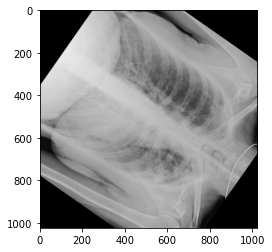

In [243]:
img3 = geometric_transform(image, type ='rotation', tx=5.5, ty=4.4, angle=np.radians(-125), scale=0.4)
plt.imshow(img3, cmap ='gray', vmin=0, vmax=255)

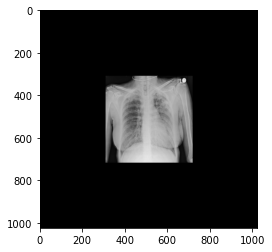

In [233]:
img4 = geometric_transform(image, type ='scaling', tx=512, ty=512, angle=np.radians(45), scale=0.4)
plt.imshow(img4, cmap ='gray', vmin=0, vmax=255)

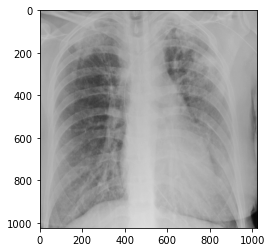

In [235]:
img5 = geometric_transform(image, type ='scaling', tx=512, ty=512, angle=np.radians(45), scale=1.4)
plt.imshow(img5, cmap ='gray', vmin=0, vmax=255)

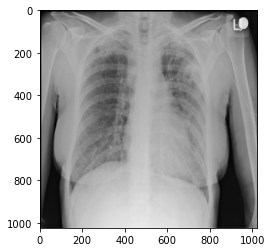

In [236]:
img6 = geometric_transform(image2, type ='translation', tx=5.5, ty=4.4, angle=np.radians(45), scale=0.4)
plt.imshow(img6, cmap ='gray', vmin=0, vmax=255)

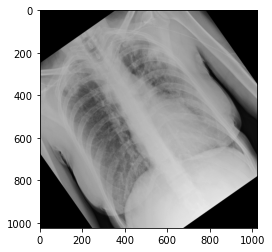

In [237]:
img7 = geometric_transform(image2, type ='rotation', tx=512, ty=512, angle=np.radians(35), scale=0.4)
plt.imshow(img7, cmap ='gray', vmin=0, vmax=255)

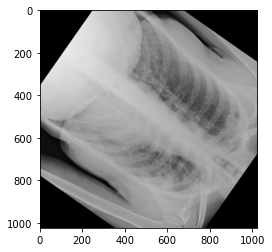

In [244]:
img8 = geometric_transform(image2, type ='rotation', tx=512, ty=512, angle=np.radians(-125), scale=0.4)
plt.imshow(img8, cmap ='gray', vmin=0, vmax=255)

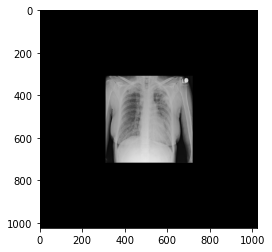

In [239]:
img9 = geometric_transform(image2, type ='scaling', tx=512, ty=512, angle=np.radians(45), scale=0.4)
plt.imshow(img9, cmap ='gray', vmin=0, vmax=255)

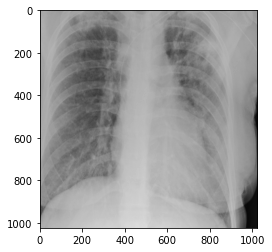

In [240]:
img10 = geometric_transform(image2, type ='scaling', tx=512, ty=512, angle=np.radians(45), scale=1.4)
plt.imshow(img10, cmap ='gray', vmin=0, vmax=255)

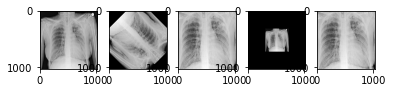

In [241]:
fig,axs = plt.subplots(1,5)
axs[0].imshow(img,cmap='gray')
axs[1].imshow(img2,cmap='gray')
axs[2].imshow(img3,cmap='gray')
axs[3].imshow(img4,cmap='gray')
axs[4].imshow(img5,cmap='gray')
plt.show()

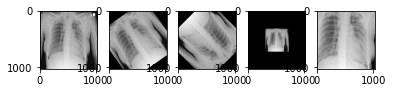

In [242]:
fig,axs = plt.subplots(1,5)
axs[0].imshow(img6,cmap='gray')
axs[1].imshow(img7,cmap='gray')
axs[2].imshow(img8,cmap='gray')
axs[3].imshow(img9,cmap='gray')
axs[4].imshow(img10,cmap='gray')
plt.show()

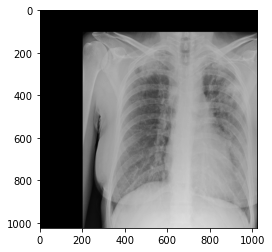

In [247]:
img6 = geometric_transform(image2, type ='translation', tx=200, ty=100, angle=np.radians(45), scale=0.4)
plt.imshow(img6, cmap ='gray', vmin=0, vmax=255)